In [2]:
import json

with open('bundesliga_shots.json', 'r', encoding='utf-8') as f:
    bl_shots = json.load(f)

with open('bundesliga_assists.json', 'r', encoding='utf-8') as f:
    bl_assists = json.load(f)

In [3]:
shot_index = 1035
shot_event = bl_shots[shot_index]

print('shot_event')
print()
print(shot_event.keys())

shot_event

dict_keys(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type', 'possession', 'possession_team', 'play_pattern', 'team', 'player', 'position', 'location', 'duration', 'related_events', 'shot'])


In [4]:
shot_data = shot_event['shot']

print('shot_data')
print()
print(shot_data.keys())

shot_data

dict_keys(['statsbomb_xg', 'end_location', 'technique', 'body_part', 'type', 'outcome', 'freeze_frame'])


In [5]:
if 'freeze_frame' in shot_data:
    freeze_frame = shot_data['freeze_frame']
    print('freeze_frame')
    print()
    print('Array of these...')
    print(freeze_frame[0].keys())
else:
    freeze_frame = None
    print('no freeze_frame')

freeze_frame

Array of these...
dict_keys(['location', 'player', 'position', 'teammate'])


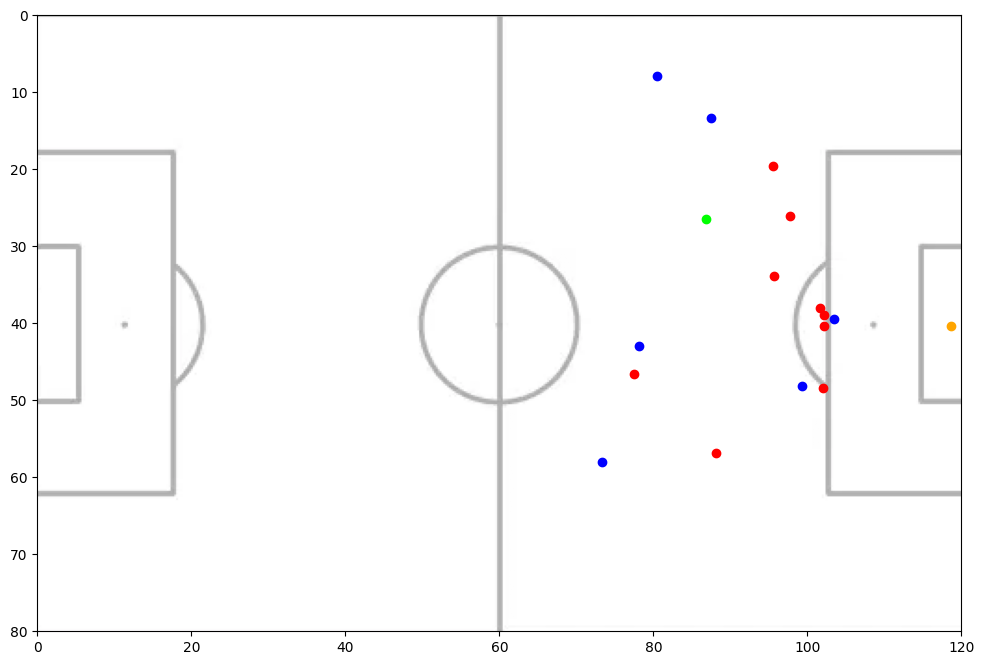

In [6]:
# print out a graph of all of the positions the players are in, colour coded by team (special colours for kicker and keeper)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def print_shot(shot_event, freeze_frame=None):

    shot_location = shot_event['location']
    team_locations = []
    op_locations = []
    keeper_location = []

    if freeze_frame is not None:
        for player in freeze_frame:
            if player['teammate']:
                team_locations.append(player['location'])
            else:
                if player['position']['id'] == 1:
                    keeper_location = player['location']
                else:
                    op_locations.append(player['location'])
    else:
        keeper_location = [120,40]

    pitch_image = mpimg.imread('pitch.png')

    # Extracting x and y coordinates for each team
    shot_x, shot_y = [shot_location[0]], [shot_location[1]]
    keeper_x, keeper_y = [keeper_location[0]], [keeper_location[1]]

    team_x, team_y = [team_location[0] for team_location in team_locations],[team_location[1] for team_location in team_locations]
    op_x, op_y = [op_location[0] for op_location in op_locations],[op_location[1] for op_location in op_locations]

    # Creating the plot
    plt.figure(figsize=(12, 8))
    plt.imshow(pitch_image, extent=(0., 120., 0., 80.))

    # Plotting shot location
    plt.scatter(shot_x, shot_y, color='lime', label='Shot')
    # Plotting keeper location
    plt.scatter(keeper_x, keeper_y, color='orange', label='GK')
    # Plotting team locations
    plt.scatter(team_x, team_y, color='blue', label='Team')
    # Plotting opponent locations
    plt.scatter(op_x, op_y, color='red', label='Opponents')

    # Setting the x and y limits
    plt.xlim(0, 120)
    plt.ylim(0, 80)

    plt.gca().invert_yaxis()

    # Display the plot
    plt.show()

print_shot(shot_event, freeze_frame)


In [9]:
# Cross data
# Dictionary of {shot_id: 'Ground Pass'}

assist_lookup = {}

total_assists = len(bl_assists)-1
for index, assist_event in enumerate(bl_assists):
    assist_lookup[assist_event['pass']['assisted_shot_id']] = assist_event['pass']['height']['name']

# for index, (key, value) in enumerate(assist_lookup.items()):
#     print(key, value)
#     if index > 50:
#         break


ba46e9d6-e828-4599-952c-39c1f7d22659 High Pass
85d67225-30fb-47c8-b478-cf568941a164 High Pass
abffd193-62bc-4c8d-8636-1e3f0f0ebbe5 Ground Pass
d9cea903-f92a-40e1-a393-1a849d83f157 Ground Pass
92ef54cd-5bb9-4b42-9d82-e60aa070e5a8 High Pass
fd99f442-49ae-4724-87e8-2512e4a5d9c6 High Pass
c4d9a52d-7469-472f-a7e1-70d5a0fe2049 Ground Pass
e06ae8d9-fdf1-434d-8526-77b9de23c2d5 Low Pass
cb389b59-0d50-4094-9bcb-5ddfab790447 Ground Pass
4aaf9747-c33d-4f76-bb0f-d25ad1ebe7c6 High Pass
3a04baf2-b287-40c9-b614-608b323087c9 Ground Pass
d740d3a5-3ebb-4887-8b11-2153ad9e958f Ground Pass
c2fe343c-a890-4a42-b7c0-33b4a5ccefcf Ground Pass
4cd68d3a-7161-4803-9c2c-75771fb67c82 Ground Pass
bbb0517f-9929-406c-957a-c4aefcb20ea9 Ground Pass
8d013eff-82ac-4fe9-8204-e99815883a61 Ground Pass
74860a2b-979f-4f2b-b86c-32243907739b Ground Pass
07536e21-de08-4fb5-9e29-85b7370d2acd Ground Pass
50a0c213-a2a7-4834-85cb-9d44d7d3bffe Ground Pass
bc4d823b-a6cf-4ce9-81ff-74a07b938c01 Ground Pass
f251354e-b226-4713-9cd4-bd2e259ae

In [11]:
# How many opposing players are nearby
# GK position (in position... if they're in the angle)

import numpy as np

final_shots = []

left_goalpost = np.array([120,36])
right_goalpost = np.array([120,44])
goal_center = np.array([120,40])

def points_in_triangle(points, a, b, c):
    area_abc = 0.5 * np.abs(
        a[0] * (b[1] - c[1]) +
        b[0] * (c[1] - a[1]) +
        c[0] * (a[1] - b[1])
    )

    area_abd = 0.5 * np.abs(
        a[0] * (b[1] - points[:, 1]) +
        b[0] * (points[:, 1] - a[1]) +
        points[:, 0] * (a[1] - b[1])
    )

    area_bcd = 0.5 * np.abs(
        b[0] * (c[1] - points[:, 1]) +
        c[0] * (points[:, 1] - b[1]) +
        points[:, 0] * (b[1] - c[1])
    )

    area_cad = 0.5 * np.abs(
        c[0] * (a[1] - points[:, 1]) +
        a[0] * (points[:, 1] - c[1]) +
        points[:, 0] * (c[1] - a[1])
    )

    in_triangle = np.isclose(area_abc, area_abd + area_bcd + area_cad)
    return np.sum(in_triangle)

def angle_abc(a, b, c):
    # Cosine rule to find angle
    BA = a - b
    BC = c - b
    dot_product = np.dot(BA, BC)
    magnitude_BA = np.linalg.norm(BA)
    magnitude_BC = np.linalg.norm(BC)
    cos_theta = dot_product / (magnitude_BA * magnitude_BC)
    return np.arccos(cos_theta)

attacking_positions = ['Right Wing', 'Right Attacking Midfield', 'Center Attacking Midfield', 'Left Attacking Midfield', 'Left Wing', 'Right Center Forward', 'Striker', 'Left Center Forward', 'Secondary Striker']

total_shots = len(bl_shots)-1
for index, shot_event in enumerate(bl_shots):

    final_shot = {}
    print(index,'/',total_shots)

    # Important shot_event data
    final_shot['index'] = index
    final_shot['id'] = shot_event['id']
    final_shot['team'] = shot_event['team']['name']
    final_shot['player'] = shot_event['player']['name']

    if 'shot' not in shot_event:
        print('No shot data for',index)
        continue

    shot_data = shot_event['shot']

    team_locations = np.empty((0, 2))
    op_locations = np.empty((0, 2))
    # will be a np array with 1 value ...
    keeper_location = np.empty((0, 2))

    if 'freeze_frame' not in shot_data:
        # Setup data to be penalty data
        player_location = np.array([119.9,40])

        keeper_location = np.vstack([keeper_location, player_location])
        op_locations = np.vstack([op_locations, player_location])
        shot_location = np.array([108,40])

    else:
        freeze_frame = shot_data['freeze_frame']
        shot_location = np.array(shot_event['location'])

        for player in freeze_frame:

            player_location = np.array(player['location'])

            if player['teammate']:
                team_locations = np.vstack([team_locations,player_location])
            else:
                # Different to the plot above, keeper is included in ops
                if player['position']['id'] == 1:
                    keeper_location = np.vstack([keeper_location, player_location])

                op_locations = np.vstack([op_locations,player_location])

    # Distance
    final_shot['distance'] = float(np.linalg.norm(shot_location - goal_center))

    # Angle to goal
    final_shot['angle'] = float(angle_abc(left_goalpost, shot_location, right_goalpost))

    # Is the keeper in the angle?
    final_shot['keeper_in_position'] = int(points_in_triangle(keeper_location,left_goalpost,shot_location,right_goalpost))

    # how many bodies in the way?
    final_shot['blocking_bodies'] = int(points_in_triangle(op_locations,left_goalpost,shot_location,right_goalpost))

    # Number of surrounding players (2 yards)
    op_distances = np.linalg.norm(op_locations - shot_location, axis=1)
    final_shot['pressuring_players'] = int(np.sum(op_distances <= 2))

    # Player is a winger/striker/attacking mid
    final_shot['attacking_position'] = 1 if shot_event['position']['name'] in attacking_positions else 0

    # These only appear in the data if they're true
    # final_shot['first_time'] = 1 if 'first_time' in shot_data else 0
    # final_shot['under_pressure'] = 1 if 'under_pressure' in shot_data else 0

    final_shot['assist_ground'] = 0
    final_shot['assist_low'] = 0
    final_shot['assist_high'] = 0

    if shot_event['id'] in assist_lookup:
        final_shot['assist_ground'] = 1 if assist_lookup[shot_event['id']] == 'Ground Pass' else 0
        final_shot['assist_low'] = 1 if assist_lookup[shot_event['id']] == 'Low Pass' else 0
        final_shot['assist_high'] = 1 if assist_lookup[shot_event['id']] == 'High Pass' else 0

    # corner, kickoff, openplay fall into both off to avoid dvt
    final_shot['penalty'] = 1 if shot_data['type']['name'] == 'Penalty' else 0
    final_shot['freekick'] = 1 if shot_data['type']['name'] == 'Free Kick' else 0

    #  Normal', 'Lob' fall into all off to avoid dvt
    final_shot['technique_other'] = 1 if shot_data['technique']['name'] in ['Overhead Kick', 'Backheel', 'Diving Header'] else 0
    final_shot['technique_halfvolley'] = 1 if shot_data['technique']['name'] == 'Half Volley' else 0
    final_shot['technique_volley'] = 1 if shot_data['technique']['name'] == 'Volley' else 0

    # Right foot is all off to avoid dvt
    final_shot['foot'] = 1 if shot_data['body_part']['name'] in ['Left Foot','Right Foot'] else 0

    # OUTCOME
    final_shot['goal'] = 1 if shot_data['outcome']['name'] == 'Goal' else 0

    # print(index)
    # for key,value in final_shot.items():
    #     print(key, value)
    # print()

    final_shots.append(final_shot)

# Output all CL shots to a json file
with open('bundesliga.json', 'w', encoding='utf-8') as file:
    json.dump(final_shots,file,indent=4,ensure_ascii=False)


0 / 7830
1 / 7830
2 / 7830
3 / 7830
4 / 7830
5 / 7830
6 / 7830
7 / 7830
8 / 7830
9 / 7830
10 / 7830
11 / 7830
12 / 7830
13 / 7830
14 / 7830
15 / 7830
16 / 7830
17 / 7830
18 / 7830
19 / 7830
20 / 7830
21 / 7830
22 / 7830
23 / 7830
24 / 7830
25 / 7830
26 / 7830
27 / 7830
28 / 7830
29 / 7830
30 / 7830
31 / 7830
32 / 7830
33 / 7830
34 / 7830
35 / 7830
36 / 7830
37 / 7830
38 / 7830
39 / 7830
40 / 7830
41 / 7830
42 / 7830
43 / 7830
44 / 7830
45 / 7830
46 / 7830
47 / 7830
48 / 7830
49 / 7830
50 / 7830
51 / 7830
52 / 7830
53 / 7830
54 / 7830
55 / 7830
56 / 7830
57 / 7830
58 / 7830
59 / 7830
60 / 7830
61 / 7830
62 / 7830
63 / 7830
64 / 7830
65 / 7830
66 / 7830
67 / 7830
68 / 7830
69 / 7830
70 / 7830
71 / 7830
72 / 7830
73 / 7830
74 / 7830
75 / 7830
76 / 7830
77 / 7830
78 / 7830
79 / 7830
80 / 7830
81 / 7830
82 / 7830
83 / 7830
84 / 7830
85 / 7830
86 / 7830
87 / 7830
88 / 7830
89 / 7830
90 / 7830
91 / 7830
92 / 7830
93 / 7830
94 / 7830
95 / 7830
96 / 7830
97 / 7830
98 / 7830
99 / 7830
100 / 7830